# Libraries

In [1]:
import time

# Functions

In [3]:
def timed(f):
    def timer(*args, **kwargs):
        if not hasattr(timer, 'start_time'):
            timer.start_time = time.process_time()

        print(f"function: {f.__name__}\n\targs: ({args}, {kwargs})")
        Fn = f(*args, **kwargs)

        if 'start_time' in timer.__dict__:
            elapsed_time = time.process_time() - timer.start_time
            print(f"  total time: {elapsed_time:.2} secs\n")
            delattr(timer, 'start_time')

        return Fn
    return timer

# Algorithms Problems

## Fibonacci Numbers
**Definition**

$
f_n =
\begin{cases}
0, \quad \quad \quad \quad \quad n=0,\\ 
1, \quad \quad \quad \quad \quad n=1,\\
F_{n-1} + F_{n-2}, \ n>1.
\end{cases}
$

### Naive Algorithm

In [9]:
def fib_recurs(n):
    if n <= 1:
        return n
    else:
        return fib_recurs(n - 1) + fib_recurs(n - 2)

In [6]:
n = 40

start = time.process_time()
Fn = fib_recurs(n)
end = time.process_time()

print(f"{fib_recurs.__name__}(n={n}) sec: {end - start:.2f}")
print(f"Fn({n}) = {Fn}")

fib_recurs(n=40) sec: 16.04
Fn(40) = 102334155


Why so slow?

Because it repeats some functions over and over again.

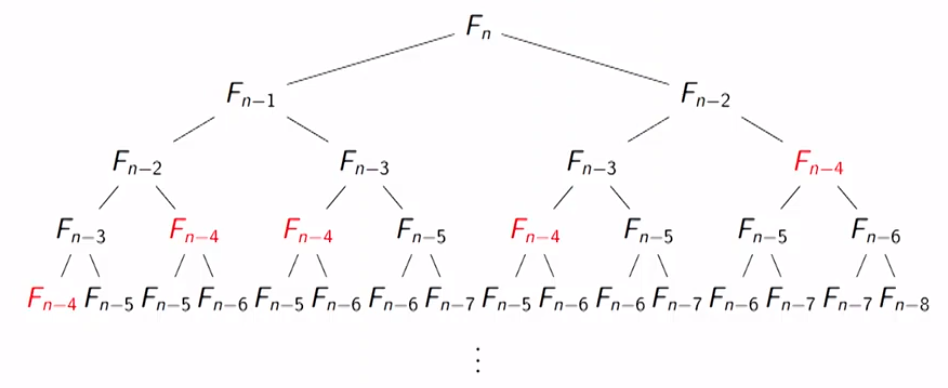

### Efficient Algorithm

Imitate hand computation:  
$0, \ 1, \ 1, \ 2, \ 3, \ 5, \ 8$

$0+1=1$  
$1+1=2$  
$1+2=3$  
$2+3=5$  
$3+5=8$  

In [10]:
@timed
def fib_list(n):
    fib_numbers = [0, 1]

    for i in range(2, n + 1):
        fib_numbers.append(fib_numbers[i - 1] + fib_numbers[i - 2])
    
    return fib_numbers[n]

In [11]:
n = 40
Fn = fib_list(40)
print(f"Fn({n}) = {Fn}")

function: fib_list
	args: ((40,), {})
  total time: 4.5e-05 secs

Fn(40) = 102334155


## Greatest Common divisors

**Definition**  
For integers, **a** an **b**, their *greatest common divisor* or  
gcd(a,b) is the largest integer **d** so that **d** divides both **a** 
and **b**.

### Naive Algorithm

In [20]:
@timed
def naive_gcd(a, b):
    best = 0
    for d in range(1, a + b + 1):
        if a%d + b%d == 0:
            best = d
    return best

In [29]:
@timed
def naive_gcd(a, b):
    d = a if a > b else b

    for i in range(d):
        d_ = d - i
        if (a % d_ == 0) and (b % d_ == 0):
            return d_
        
    return 0

In [30]:
a = 31_918_848
b = 11_653_264
Fn = naive_gcd(a, b)

print(f"Fn({a}, {b}) = {Fn}")

function: naive_gcd
	args: ((31918848, 11653264), {})
  total time: 2.0 secs

Fn(31918848, 11653264) = 16


### Efficient Algorithm

**Lemma**  
Let $a'$ be the remainder when $a$ is divided by $b$, then  
$ gcd(a,b) = gcd(a',b) = gcd(b,a')$

**Proof**
- $a=a' + bq$ for some $q$
- $d$ divides $a$ and $b$ *if and only if* it divides $a'$ and $b$

In [41]:
def euclid_gcd(a, b):
    if b == 0:
        return a
    a_prime = a % b
    return euclid_gcd(b, a_prime)

In [42]:
a = 31_918_848
b = 11_653_264

start = time.process_time()
Fn = euclid_gcd(a, b)
end = time.process_time()

print(f"{euclid_gcd.__name__}({a}, {b}) took: {end - start:.2} secs")
print(f"Fn({a}, {b}) = {Fn}")

euclid_gcd(31918848, 11653264) took: 4.6e-05 secs
Fn(31918848, 11653264) = 16


Finding the correct algorithm requires knowing something interesting
about the problem.

# Computing Runtime
To figure out how long a program would actually take to run on a real  
computer, we would also need to know things like:
- The speed of the computer the program is running on.
- The system architecture of the computer.
- The compiler being used.
- Details of the memory hierarchy.

**Problems**
- Figuring out accurate runtime is a **huge mess**.
- In practice, you might not even know some of these details.

## Asymptotic NOtation

How does runtime **scale** with input size.


### Approximate runtime
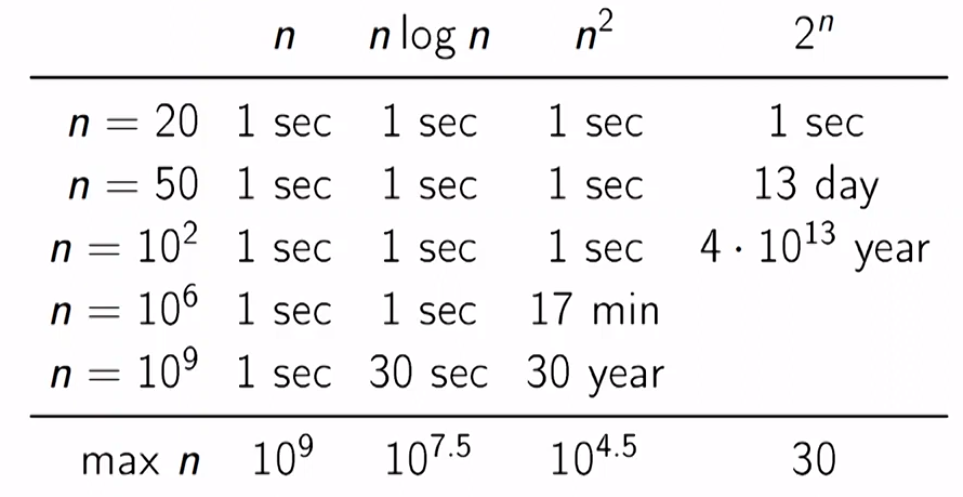

### Common times

 $\huge \log n < \sqrt{n} < n < n\log n < n² < 2^n$

The larger n is, the further these times become from each other.

## Big-O Notation

**Definition**

$f(n) = O(g(n))$  ($f$ if Big-O of $g$)  or $f \leq g$  
if there exist constants $N$ and $c$ so that for  
all $n \geq f(n) \leq c . g(n)$.

At least for sufficiently large inputs $f$ is bounded above by *some*  
constant multiple of $g$.

**Example**  
$3n² + 5n +2 = O(n²)$  since if  $n\geq 1,$  
$3n² + 5n +2 \geq 3n² + 5n² +2n² = 10n²$

### Advantages
- Clarifies growth rate.
- Cleans up notation: Makes easier to manipulate Big-O expressions.
- Allows to ignore complicated details.

### Warnings
- Using Big-O loses important information about constant multiples.
- Big-O is only asymptotic: It just give a notation for really big
inputs.

If you really want to make your program faster you need to look at    
more than just Big-O runtime.

## Using Big-O

### Common rules

Multiplicative constants can be omitted:  
- $7n³ = O(n³),\, \frac{n²}{3} = O(n²)$

$n^a  \prec n^b \ $ for $\ 0 < a < b$  
- $n=O(n²),\, \sqrt{n}=O(n)$

$n^a \prec b^n \ (a < 0,\, b>1)$  
- $n⁵ = O(\sqrt{2}²),\, n^{100} = O(1.1^n)$

$(log n)^a \prec n^b \, (a,b > 0)$
- $(log n)^3 =  O(\sqrt{2}),\, n(\log n) = O(n²)$

Smaller terms can be omitted:
- $n² + n = O(n²),\, 2^n + n⁹ = O(2^n)$


### Big-O in Practice
Recall Algorithm:  
Compute this runtime in Big-O notation

**Function FibList(n)**
```js
create an array F[0...n]
F[0] <- 0
F[1] <- 1
for i from 2 to n:
    F[i] <- F[i - 1] + F[i - 2]
return F[n]
```

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 20px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 20px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff00;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-zv4m"><span style="font-weight:bold"><b>Runtime</b></span></th>
    <th class="tg-zv4m"><span style="font-weight:bold"><b>Operation</b></span></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-zv4m">create an array F [0...n]</td>
    <td class="tg-zv4m">O(n)</td>
  </tr>
  <tr>
    <td class="tg-zv4m">F[0] &lt;- 0</td>
    <td class="tg-zv4m">O(1)</td>
  </tr>
    <tr>
    <td class="tg-zv4m">F[1] &lt;- 1</td>
    <td class="tg-zv4m">O(1)</td>
  </tr>
  <tr>
    <td class="tg-zv4m">for i from 2 to n:</td>
    <td class="tg-zv4m">Loop O(n) times</td>
  </tr>
  <tr>
    <td class="tg-zv4m"><span style="padding:10px 20px;"/>F[i] &lt;- F[i - 1] + F[i - 2]</td>
    <td class="tg-zv4m">O(n)</td>
  </tr>
  <tr>
    <td class="tg-zv4m">return F[n]<br></td>
    <td class="tg-zv4m">O(1)</td>
  </tr>
</tbody>
</table>


**Total**  
$O(n)+O(1)+O(1)+O(n)*O(n)+O(1)=O(n²)$

Means if you want to finish this operation in a second,  
you can probably handle inputs of size maybe 30.000


## Other Notation

### bounded below

**Definition**  
For functions $f, g: \mathbb{N} \to \mathbb{R}^+$ we say that:  
-  $\small f(n)=\Omega(g(n)) \text{ or } f \geq g \text{ if for some }c$,  
$\small f(n)=c*g(n) \, (f\text{ grows no slower than }g).$

### same growth rate

**Definition**  
For functions $f, g: \mathbb{N} \to \mathbb{R}^+$ we say that:  
-  $\small f(n)=\Theta(g(n)) \text{ or } f \asymp g \text{ if }f=O(g)$,  
$\small \text{ and } f(n)=\Omega(g(n)) (f\text{ grows at the same rate as }g).$

### strictly slower growth

**Definition**  
For functions $f, g: \mathbb{N} \to \mathbb{R}^+$ we say that:  
-  $\small f(n)=o(g(n)) \text{ or } f \leq g \text{ if}$,  
$\small f(n)/g(n) \to 0\, \text{ as }n\to \infty \, (f\text{ grows slower than }g).$


# Algorithm design techniques

Three of the most common algorithmic design techniques:
- Greedy Algorithms.
- Divide and Conquer.
- Dynamic Programming.


## Levels of Design
**Naive Algorithm**:
- Definition to algorithm.
- Slow.

**Algorithm by way of standard Tools**:
- Standard techniques.

**Optimized Algorithm**:
- Improve existing algorithm.  

**Magic Algorithm**:
- Unique insight.  

## Greedy Algorithms

### Main Ingredients

#### Reduction to Subproblem
+ Make a first move.
+ Then solve a problem of the same kind.
+ Smaller: fewer digits, fewer fuel stations.
+ This is called a "subproblem".

#### Safe Move
+ A move is called safe if there is an optimal solution consistent
  with this first move.
+ Not all first moves are safe.
+ Often greedy moves are not safe.

#### General Strategy
+ Make a greedy choice.
+ <span style="color:#f02c00">Prove</span> that it is a <span style="color:#0ceb0f">safe move</span>
+ Reduce to a <span style="color:#2235e0">subproblem</span>
+ Solve the <span style="color:#2235e0">subproblem</span>
+ Iterate until there are no problems left
+ Estimate running time

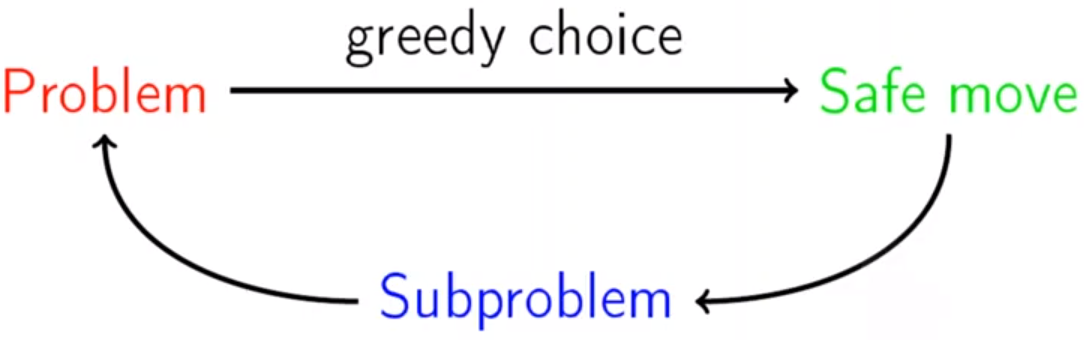

### Optimization
+ Assume everything is somehow sorted
+ Which sort order is convenient?
+ Greedy move can be faster after sorting

### Largest Number
What is the largest number that consists of digits 3, 9, 5, 9, 7, 1?  
Use all the digits.

#### Greedy Strategy
- Start with a list of digits.
- Find the **max** digit in the list.
- **Append** it to the number.
- **Remove** from the list of digits.
- Repeat while there are digits in the list.

In [71]:
@timed
def largest_number(digit_list: list[int]) -> list[int]:
    _digit_list = digit_list.copy()
    largest_number = []

    for _ in range(len(_digit_list)):
        max_index = _digit_list.index(max(_digit_list))
        max_number = _digit_list.pop(max_index)
        largest_number.append(max_number)

    return largest_number

In [78]:
digit_list = [5, 7, 3, 9, 1, 9]
Fn = largest_number(digit_list)
print(f"digit_list({digit_list}) = {Fn}")

function: largest_number
	args: (([5, 7, 3, 9, 1, 9],), {})
  total time: 3.1e-05 secs

digit_list([5, 7, 3, 9, 1, 9]) = [9, 9, 7, 5, 3, 1]


### Car Fueling
**Input**  
A car which can travel at most $L$ kilometers with full tank, a source   
point $A$, a destination point $B$ and $n$ gas stations at distances  
$x_1\leq x_2 \leq x_3\leq \cdots \leq x_n$ in kilometers from $A$ along  
the path from $A$ to $B$.

**Output**  
The minimum number of refills to get from $A$ to $B$, besides refill
at $A$.

Distance with full tank = 400km  

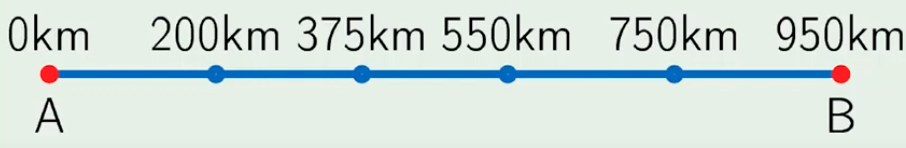


#### Greedy Strategy
- Make some greedy choice.
- Reduce to a smaller problem.
- Iterate.

**Greedy Choice**  
- Refill at the closest gas station.
- <span style="color:#0ceb0f">Refill at the farthest reachable gas station.</span>
- Go until there is no fuel.

**Greedy Algorithm:**
- Start at $A$.
- Refill at the farthest reachable gas station $G$.
- Make $G$ the new $A$.
- Get from new $A$ to $B$ with minimum number of refills.



#### Subproblem
**Definition**  
Is a similar problem of smaller size.

**Examples**
- LargestNumber(3,9,5,9,7,1) =  
"9" + LargestNumber(3,5,9,7,1)
- Min number of refills from $A$ to $B$ =  
first refill at $G$ + Min number of refills from $G$ to $B$

#### Safe Move
**Definition**  
A greedy choice is called **safe move** if there is an optimal solution  
consistent with this first move.

**Lemma**  
To refill at the farthest reachable as station is a **safe move**.

#### Implementation

In [135]:
@timed
def min_refills(X: list[int], L: int) -> int:
    refills = 0
    last_stop = 0

    for i in range(len(X)):        
        if X[i] - last_stop > L:
            if X[i] - X[i - 1] <= L:
                refills += 1
                last_stop = X[i - 1]
            else:
                raise Exception("Impossible")
    
    return refills



In [170]:
print(min_refills(X=[0, 200, 375, 550, 750, 800, 950], L=400))

function: min_refills
	args: ((), {'X': [0, 200, 375, 550, 750, 800, 950], 'L': 400})
  total time: 3e-05 secs

2


In [144]:
# Course implementation
@timed
def course_min_refills(X, L):
    n = len(X) - 2
    num_refills = 0
    current_refill = 0

    while current_refill <= n:
        last_refill = current_refill
        while (current_refill <= n and
               X[current_refill + 1] - X[last_refill] < L):
            current_refill += 1
        if current_refill == num_refills:
            raise NotImplementedError("Impossible")
        if current_refill <= n:
            num_refills += 1
    return num_refills

In [171]:
print(course_min_refills(X=[0, 200, 375, 550, 750, 950], L=400))

function: course_min_refills
	args: ((), {'X': [0, 200, 375, 550, 750, 950], 'L': 400})
  total time: 2.9e-05 secs

2


##### Runtime
For the first look it can be seen that the algorithm runs in $O(n²)$  
runtime because of the nested while loops.
```python
    while current_refill <= n:
        last_refill = current_refill
        while (current_refill <= n and
               X[current_refill + 1] - X[last_refill] < L):
            current_refill += 1
```

But actually it only makes $O(n)$ actions for the whole algorithm.  

**Lemma**  
The running time of ```min_refills(X, L)``` is $O(n)$.  
**Proof**  
- ```current_refill``` changes form $0$ to $n+1$, one-by-one.
- ```num_refills``` changes form $0$ to at most $n$, one-by-one.
- Thus, $O(n)$ iterations.

### Grouping Children

#### The Problem
Many children came to a celebration. Organize them into the minimum  
possible number of groups such that the age of any two children in the  
same group differ by at most one year.


#### Naive Algorithm

```js
MinGroups(C):
    m <- len(C)
    for each partition into groups
    C = G1 U G2 U ... U Gk:
        good <- true
        for i from 1 to k:
            if max(Gi) - min(Gi) > 1:
                good = false
        if good:
            m <- min(m, k)
    return m
 ```

 **Lemma**  
 The number of operations in MinGroups(C)  
 is a least $2^n$, where *n* is the number of  
 children in C.

 **Proof**  
+ Consider just partitions in two groups.
+ $C$ = $G_1$ $\cup$ $G_2$
+ For each $G_1$ $\subset$ $C$, $G_2 = C \backslash G1$
+ Size of $C$ is $n$
+ Each item can be included or excluded  
from $G_1$
+ There are $2^n$ different $G_1$
+ **Thus, at least $2^n$ operations**

#### Efficient Algorithm

**Before solving every algorithm problem, you should reformulate it in**  
**mathematical terms.**

##### Covering points by segments
**Input**:  
A set of $n$ points $x_1, ..., x_n \in \mathbb{R}$  
**Output**:  
The minimum  number of segments of unit length needed  
to cover all the points.


##### Safe Move
Cover  the leftmost most point with an unit segment  
with left end in this point.

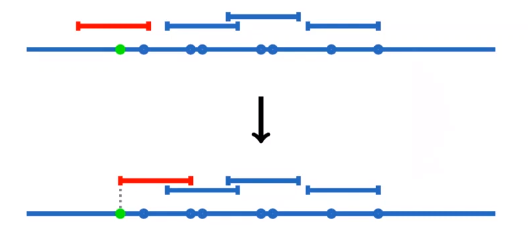

Repeat the process until there are not points lefts.



#### Implementation

In [213]:
@timed
def points_cover_sorted(points: list[int], length: int):
    # Assume points are sorted
    groups = [[]]
    left_point = points[0]

    for point in points:
        if point - left_point <= length:
            groups[-1].append(point)
        else:
            groups.append([point])
            left_point = point
    return groups

In [228]:
C = [1, 2, 2, 3, 4, 4, 4, 5, 6, 6, 7, 7, 7, 8, 24, 26, 26, 27]
# C = list(range(1, 10_000))
groups = points_cover_sorted(C, 1)
print(groups)

function: points_cover_sorted
	args: (([1, 2, 2, 3, 4, 4, 4, 5, 6, 6, 7, 7, 7, 8, 24, 26, 26, 27], 1), {})
  total time: 4e-05 secs

[[1, 2, 2], [3, 4, 4, 4], [5, 6, 6], [7, 7, 7, 8], [24], [26, 26, 27]]


In [4]:
# Course implementation
@timed
def course_points_cover_sorted(X: list[int], length: int):
    R = []
    i = 0
    while i < len(X):
        R0 = []
        r = X[i] + length
        while i < len(X) and X[i] <= r:
            R0.append(X[i])
            i += 1
        R.append(R0)
    
    return R


In [9]:
C = [1, 2, 2, 3, 4, 4, 4, 5, 6, 6, 7, 7, 7, 8, 24, 26, 26, 27]
# C = list(range(1, 10_000))
groups = course_points_cover_sorted(C, 1)
print(groups)

function: course_points_cover_sorted
	args: (([1, 2, 2, 3, 4, 4, 4, 5, 6, 6, 7, 7, 7, 8, 24, 26, 26, 27], 1), {})
  total time: 7.6e-05 secs

[[1, 2, 2], [3, 4, 4, 4], [5, 6, 6], [7, 7, 7, 8], [24], [26, 26, 27]]


### Fractional knapsack

**Input**:  
Weights $w_{1},  ..., w_{n}$ and values $v_{1},  ..., v_{n}$  of $n$  
items; capacity $W$.


**Output**:  
The maximum total value of fractions of items that fit  
into a bag of capacity $W$


#### Greedy Algorithm
+ While knapsack is not full
+ Choose item $i$ with maximum $\frac{v_i}{w_i}$
+ If item fits into knapsack, take all of it
+ Otherwise take so much as to fill the knapsack
+ Return total value and amounts taken

**Lemma**

There exists an optimal solution that uses as  
much as possible of an item with the  
maximal value per unit of weight.

#### Implementation

In [14]:
@timed
def fill_knapsack(W, w, v):
    _w = w.copy()
    amounts = [0] * len(w)
    _W = W
    vpu = [vi/wi for vi, wi in zip(v, w)]


    while _W > 0:
        mvpu = vpu.index(max(vpu))

        amount = w[mvpu] if w[mvpu] <= _W else _W

        _w[mvpu] -= amount
        amounts[mvpu] = amount
        _W -= amount
    
    return amounts
        




In [15]:
W = 7
w = [4, 3, 2]
v = [20, 18, 14]

solution = fill_knapsack(W, w, v)

print(solution)

function: fill_knapsack
	args: ((7, [4, 3, 2], [20, 18, 14]), {})
  total time: 7.8e-05 secs

[0, 0, 1]


In [218]:
@timed
def fill_knapsack(W, w, v):
    v_unit = [v/w for w, v in zip(w, v)]

    n = len(w)
    A = [0] * n
    V = 0

    for _ in range(n):
        if W == 0:
            return (V, A)
        
        # Select i with w_i > 0 and max v_i/w_i
        max_v_unit = max(v_unit,
                         key=lambda x: x if w[v_unit.index(x)] > 0 else 0)
        i = v_unit.index(max_v_unit)

        a = min(w[i], W)
        V += a * max_v_unit
        w[i] -= a
        A[i] += a
        W -= a
    return (V, A)

In [219]:
W = 7
w = [4, 3, 2]
v = [20, 18, 14]

solution = fill_knapsack(W, w, v)

print(solution)

function: fill_knapsack
	args: ((7, [4, 3, 2], [20, 18, 14]), {})
  total time: 0.00021 secs

(42.0, [2, 3, 2])


##### Lemma
The running time of fill_knapsack is $O(n²)$


**Proof**  
+ Select best item on each step is $O(n)$
+ Main loop is executed $n$ times
+ Overall, $O(n²)$

#### Optimization
+ Is is possible to improve asymptotics!
+ First, sort items by decreasing $\frac{v}{w}$

In [43]:
@timed
def fill_knapsack_optimized(W, w, v):
    # Assume v_1/w_1 >= v_2/w_2 >= ... >= v_n/w_n 
    n = len(w)
    A = [0] * n
    V = 0

    for i in range(n):
        if W == 0:
            return (V, A)

        a = min(w[i], W)
        V += a * (v[i]/w[i])
        w[i] -= a
        A[i] += a
        W -= a
    return (V, A)

In [44]:
W = 7
w = [2, 3, 4]
v = [14, 18, 20]

solution = fill_knapsack_optimized(W, w, v)

print(solution)

function: fill_knapsack_optimized
	args: ((7, [2, 3, 4], [14, 18, 20]), {})
	secs: 9.4e-06

(42.0, [2, 3, 2])


##### Asymptotics
+ Now each iteration is $O(1)$
+ fill_knapsack after sorting is $O(n)$
+ Sort + fill_knapsack is $O(n\log{n})$

## Divide and Conquer

### Main Idea
Applied to war, it suggest that it's easier to defeat several  
smaller groups of opponents than try and defeat one large group.

Divide and conquer algorithms take advantage of breaking a problem  
down into one or more sub-problems that can be solved independently.

### General Structure
+ Given a problem to be solved
+ **Divide**: Break into non-overlapping sub-problems of the same type
+ **Conquer**: Solve each problem independently
+ **Combine** the results into a solution

Since each sub-problem is of the same type as the original, we can  
recursively solve the sub-problem using the same *Divide and Conquer*  
Strategy. Thus, **divide and conquer algorithms naturally leads to a**  
**recursive solution** 




### Linear Search
Searching in an unsorted array.

**Input**  
An array $A$ with $n$ elements.  
$A$ key $k$  
**Output**  
An index. $i$, where $A[i] = k$.  
If there is no such $i$, then  
NOT_FOUND







#### Recursive Solution

In [8]:
def linear_search(A, low, high, key):
    if high < low:
        return "NOT_FOUND"
    if A[low] == key:
        return low
    return linear_search(A, low + 1, high, key)

In [11]:
A = [1, 2, 3, 4, 5, 6]
low = 0
high = len(A) - 1
key = 4

solution = linear_search(A, low, high, key)

print(f"{solution=}")

solution=3


This algorithm is more of a "*subtract and conquer*"

**Definition**  
A **recurrence relation** is an equation  
recursively defining a sequence of values.



##### Runtime Analysis
To analyze divide and conquer runtime, we usually define a  
recurrence relation for $T(n)$
+ Where $T$ stands for the worst case time taken for the  
algorithm
+ $n$ is the size of the problem


In this case, the worst case time is when an element is not  
found, because we must check every element of the array

##### Recurrence defining worst-case time
$ T(n) = T(n-1) + c$

*In this case, a recursion for a problem size $n$, consists*  
*of a sub-problem size of $n-1$ plus a constant amount of work*

##### Recursion Tree
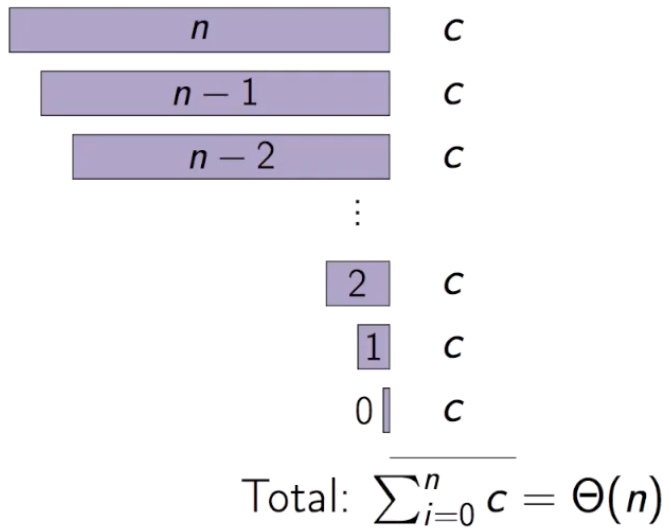

#### Iterative Version


In [134]:
@timed
def iterative_linear_search(A, low, high, key):
    for i in range(low, high):
        if A[i] == key:
            return i            
    return "NOT_FOUND"

In [135]:
A = [1, 2, 3, 4, 5, 6]
low = 0
high = len(A) - 1
key = 4

solution = iterative_linear_search(A, low, high, key)

print(f"{solution=}")

function: iterative_linear_search
	args: (([1, 2, 3, 4, 5, 6], 0, 5, 4), {})
	secs: 3.7e-05

solution=3


#### Summary
+ Create a recursive solution
+ Define a corresponding recurrence  
relation, $T$
+ Determine $T(n)$: worst-case runtime
+ Optionally, create a iterative solution

### Binary Search

#### Searching in a sorted array 
**(Monotonic not decreasing array)**

**Input**   
A sorted array $A[low...high]$  
$(\forall low \leq i < high: A[i]\leq A[i+1])$  
A key $k$

**Output**  
An index, $i$, $low \leq i \leq high$ where  
$A[i]=k$.  
Otherwise, the greatest index $i$,  
where $A[i]<k$  
Otherwise $k<A[low]$, the result is  
$low-1$

**Example**  
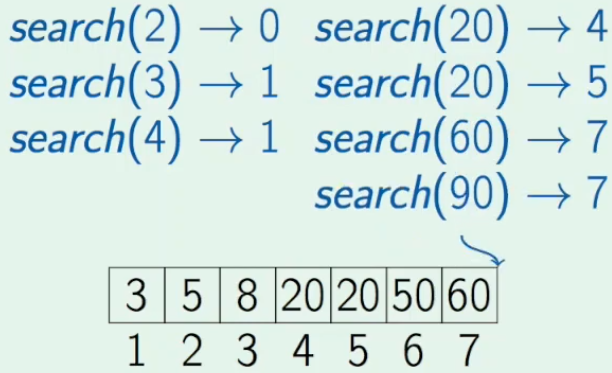


##### Recursive Solution

In [205]:
@timed
def binary_search(A, low, high, key) -> int:
    if high < low:
        return low - 1

    mid = low + int((high - low)/2)

    if key == A[mid]:
        return mid
    elif key < A[mid]:
        return binary_search(A, low, mid - 1, key)
    else:
        return binary_search(A, mid + 1, high, key)

In [213]:
A = [3, 5, 8, 10, 12, 15, 18, 20, 20, 50, 60]
low = 0
high = len(A) - 1
key = 50

solution = binary_search(A, low, high, key)

print(f"{solution=}")

function: binary_search
	args: (([3, 5, 8, 10, 12, 15, 18, 20, 20, 50, 60], 0, 10, 50), {})
function: binary_search
	args: (([3, 5, 8, 10, 12, 15, 18, 20, 20, 50, 60], 6, 10, 50), {})
function: binary_search
	args: (([3, 5, 8, 10, 12, 15, 18, 20, 20, 50, 60], 9, 10, 50), {})
  total time: 6.3e-05 secs

solution=9


**Sumary**

+ Break problem into non-overlapping  
subproblems of the same type
+ Recursively solve those subproblems
+ Combine results of subproblems

###### Runtime Analysis
**Worst Case**  
$T(n)=T(\lfloor\frac{n}{2}\rfloor) + c$  
**Base Case**  
$T(n)$

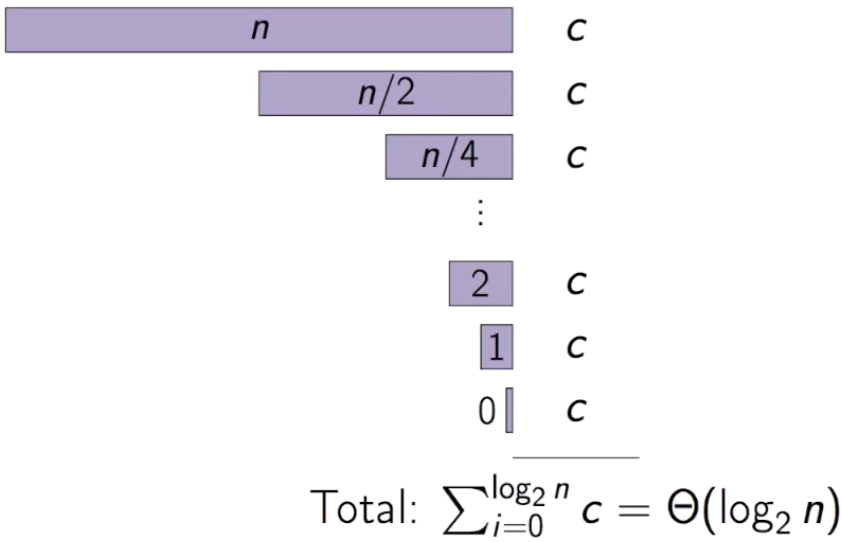

##### Iterative Version

In [207]:
@timed
def iterative_binary_search(A, low, high, key):
    while low <= high:
        mid = low + int((high - low)/2)

        if key == A[mid]:
            return mid
        elif key < A[mid]:
            high = mid - 1
        else:
            low = mid + 1

    return low - 1

In [208]:
A = [3, 5, 8, 10, 12, 15, 18, 20, 20, 50, 60]
low = 0
high = len(A) - 1
key = 50

solution = iterative_binary_search(A, low, high, key)

print(f"{solution=}")

function: iterative_binary_search
	args: (([3, 5, 8, 10, 12, 15, 18, 20, 20, 50, 60], 0, 10, 50), {})
  total time: 5.5e-05 secs

solution=9


#### Summary
The runtime of binary search is  $\ \theta(\log{n})$

### Polynomial Multiplication

